In [1]:
from ast import arg

import matplotlib.cbook as cbook
import random
import itertools
import copy
import os

from analysis_utils import*
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict

from scipy.stats import mannwhitneyu

In [2]:
methods = ['degree', 'degree_random', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'neiNodesNum', 'new_neiNodeSum_1','new_neiNodeSum_1_HNCsize']
methods_rvs = methods[::-1]
msPath = '../../MeasureValuesRanking/NodesMeasures'
msDic = dict()
for net in range(1,21):
    msDic[net] = dict()
    for ms in methods:
        with open(f'{msPath}/h_{ms}_realNet_{net}.json') as f:
            msDic[net][ms] = json.load(f)

In [10]:
# mu = 0.1
# nets_paras = {
#     1:{'net':1, 'l':[1e-3, 3e-4, 9e-5, 8e-5]},
#     2:{'net':2, 'l':[2e-2, 6e-3, 3e-3, 2e-3]},
#     3:{'net':3, 'l':[2e-2, 8e-3, 2e-3, 2e-3]},
#     4:{'net':4, 'l':[1e-2, 4e-3, 2e-3, 8e-4]},
#     5:{'net':5, 'l':[4e-2, 7e-3, 4e-3, 2e-3]},
#     6:{'net':6, 'l':[3e-4, 1e-4, 5e-5, 4e-5]},
#     7:{'net':7, 'l':[9e-3, 4e-3, 2e-3, 2e-3]},
#     8:{'net':8, 'l':[9e-3, 9e-3, 4e-3, 2e-3]},
#     9:{'net':9, 'l':[3e-3, 3e-3, 1e-3, 7e-4]},
#     10:{'net':10, 'l':[9e-4, 7e-4, 4e-4, 2e-4]},
#     11:{'net':11, 'l':[6e-4, 6e-4, 4e-4, 2e-4]},
#     12:{'net':12, 'l':[7e-3, 6e-3, 9e-3, 5e-3]},
#     13:{'net':13, 'l':[6e-3, 6e-3, 4e-3, 4e-3]},
#     14:{'net':14, 'l':[1e-3, 1e-3, 8e-4, 5e-4]},
#     15:{'net':15, 'l':[9e-3, 5e-3, 5e-3, 4e-3]},
#     16:{'net':16, 'l':[6e-3, 6e-3, 5e-3, 5e-3]},
#     17:{'net':17, 'l':[5e-2, 1e-2, 5e-3, 4e-3]},
#     18:{'net':18, 'l':[1e-2, 5e-3, 3e-3, 2e-3]},
#     19:{'net':19, 'l':[1e-2, 6e-3, 2e-3, 8e-4]},
#     20:{'net':20, 'l':[5e-3, 3e-3, 2e-3, 8e-4]},
# }

In [3]:
mu = 1
nets_paras = {
    1:{'net':1, 'l':[6e-3, 2e-3, 1e-3, 7e-4]},
    2:{'net':2, 'l':[2e-1, 6e-2, 5e-2, 4e-2]},
    3:{'net':3, 'l':[9e-2, 5e-2, 3e-2, 2e-2]},
    4:{'net':4, 'l':[9e-2, 3e-2, 2e-2, 1e-2]},
    5:{'net':5, 'l':[3e-1, 7e-2, 5e-2, 3e-2]},
    6:{'net':6, 'l':[2e-3, 1e-3, 7e-4, 6e-4]},
    7:{'net':7, 'l':[1e-1, 4e-2, 3e-2, 2e-2]},
    8:{'net':8, 'l':[8e-2, 9e-2, 4e-2, 3e-2]},
    9:{'net':9, 'l':[3e-2, 3e-2, 1e-2, 8e-3]},
    10:{'net':10, 'l':[6e-3, 5e-3, 4e-3, 3e-3]},
    11:{'net':11, 'l':[4e-3, 4e-3, 4e-3, 3e-3]},
    12:{'net':12, 'l':[6e-2, 5e-2, 6e-2, 5e-2]},
    13:{'net':13, 'l':[4e-2, 4e-2, 4e-2, 3e-2]},
    14:{'net':14, 'l':[1e-2, 1e-2, 9e-3, 6e-3]},
    15:{'net':15, 'l':[5e-2, 5e-2, 6e-2, 4e-2]},
    16:{'net':16, 'l':[5e-2, 4e-2, 4e-2, 4e-2]},
    17:{'net':17, 'l':[3e-1, 1e-1, 7e-2, 6e-2]},
    18:{'net':18, 'l':[9e-2, 5e-2, 3e-2, 3e-2]},
    19:{'net':19, 'l':[9e-2, 4e-2, 2e-2, 2e-2]},
    20:{'net':20, 'l':[5e-2, 3e-2, 2e-2, 2e-2]},
}

In [11]:
# Preprocess it into a dictionary, where the key is the network parameter and 
# the value is a result dictionary (the key is the node number and the value is the node)
Mu = int(mu*10)
with open(f'ncSize_SIR_all_robust_range_mu{Mu}.json', 'r') as f:
    result = json.load(f)

resultDic = defaultdict(dict)
for item in result:
    itemsp = item.split('_')
    net = itemsp[0][1:]
    nu = itemsp[1][2:]
    l = itemsp[2][1:]
    node = itemsp[4][3:]
    resultDic[f'n{net}_nu{nu}_l{l}'][node] = result[item]

In [12]:
# Add supplementary parameters
with open(f'ncSize_SIR_all_robust_range_mu{Mu}.json', 'r') as f:
    result = json.load(f)
for item in result:
    itemsp = item.split('_')
    net = itemsp[0][1:]
    nu = itemsp[1][2:]
    l = itemsp[2][1:]
    node = itemsp[4][3:]
    resultDic[f'n{net}_nu{nu}_l{l}'][node] = result[item]

In [13]:
methods = ['degree', 'degree_random',  'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'neiNodesNum', 'new_neiNodeSum_1','new_neiNodeSum_1_HNCsize']

tauDic = dict()
for net in range(1,21): 
    tauDic[net] = dict()
    for nu in [1,2,3,4]:
        tauDic[net][nu] = dict()
        lThres = nets_paras[net]['l'][nu-1]
        l_up = lThres*10
        for l in [lThres*0.1, lThres, l_up]:
            tauDic[net][nu][l] = dict()
            for ms in methods:
                with open(f'../../MeasureValuesRanking/NodesMeasures/h_{ms}_realNet_{net}.json', "r") as h:
                    msDic = json.load(h)
                tauDic[net][nu][l][ms] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic, 'b'), 5)
                

In [7]:
labelsshow = {'new_neiNodeSum_1_HNCsize':'IPS$_{t=1}^{HCSA}$', 
          'degree':'Hyper-degree',
          'clsBetweenness':'2-Betweenness', 
          'clsCloseness':'2-Closeness', 
          'clsKcore':'2-K-coreness', 
          'clsEigenvector':'2-Eigenvector', 
          'KMcore_g1':'Hyper-coreness-R', 
          'KMcore_gf':'Hyper-coreness-$R_w$', 
          'neiNodesNum':'2-Degree', 
          'nodeEdgeEigenvector_linear':'Eigenvector_linear', 
          'nodeEdgeEigenvector_max':'Eigenvector_linear',
          'new_precise_prob_t2_iNum_p1':'MIS-i-$t_2$', 
          'new_precise_prob_t2_irNum_p1':'MIS-ir-$t_2$', }
colors = {'new_neiNodeSum_1_HNCsize':'crimson', 
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
            'degree_random': 'mediumblue',
          }

0.1 	 1 	 0.1


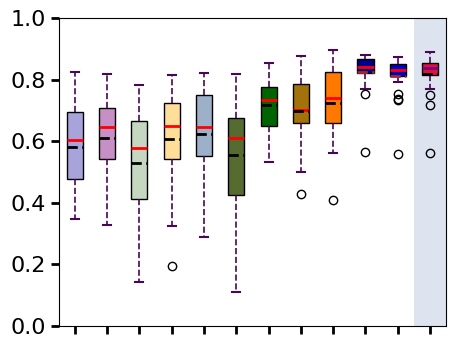

0.1 	 1 	 1


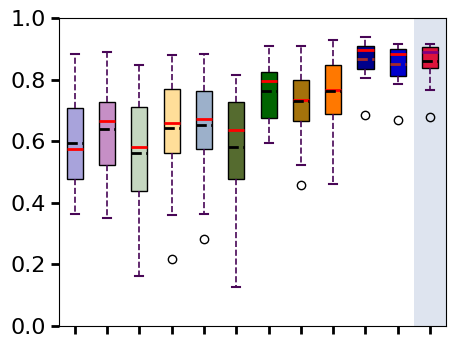

0.1 	 1 	 10


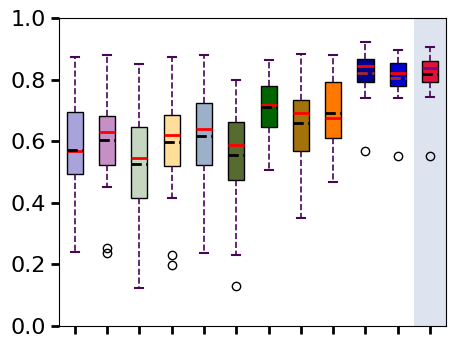

0.1 	 2 	 0.1


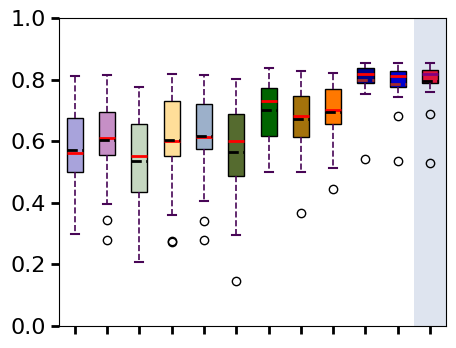

0.1 	 2 	 1


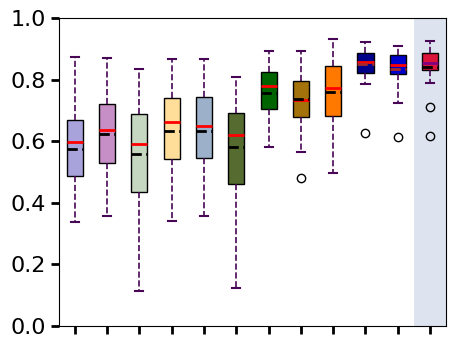

0.1 	 2 	 10


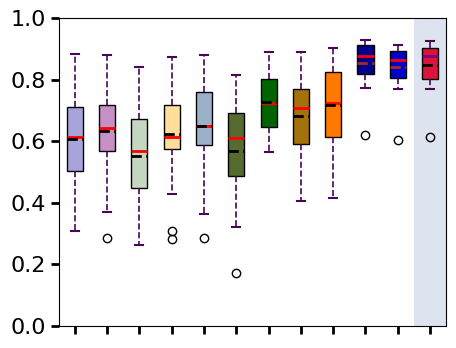

0.1 	 3 	 0.1


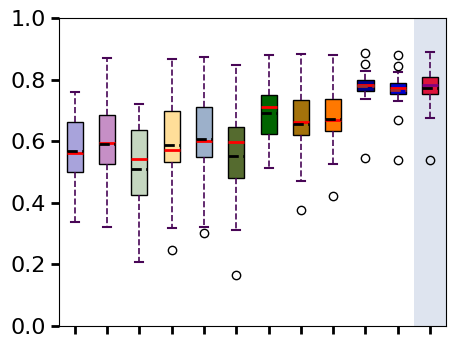

0.1 	 3 	 1


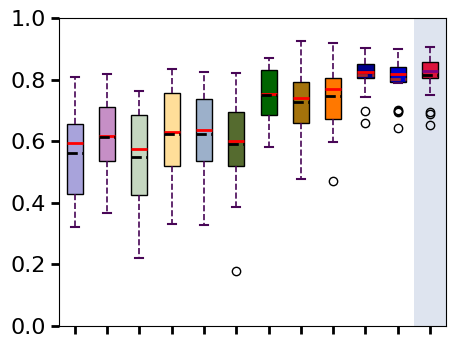

0.1 	 3 	 10


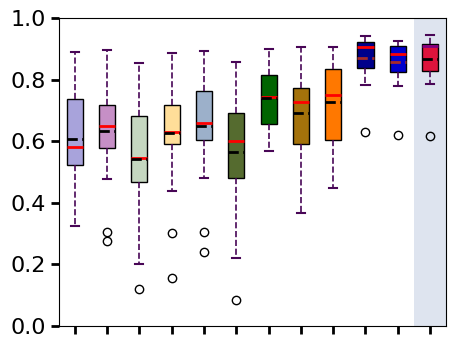

0.1 	 4 	 0.1


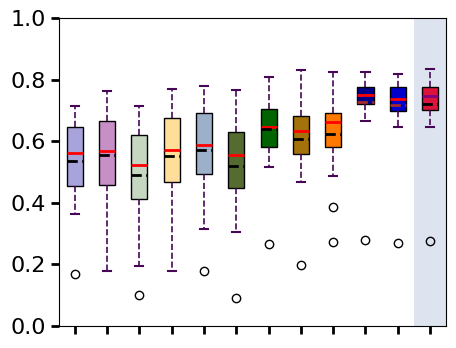

0.1 	 4 	 1


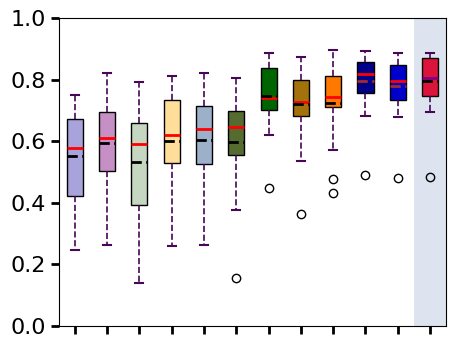

0.1 	 4 	 10


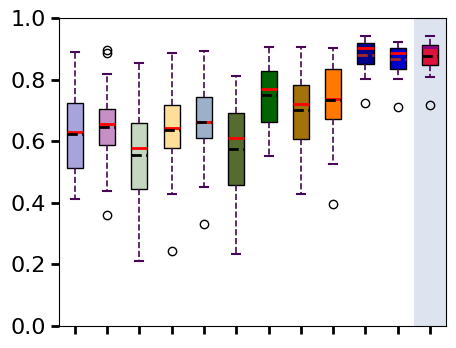

In [14]:
methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                 'KMcore_g1', 'KMcore_gf',
            'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'degree', 'degree_random',
                'new_neiNodeSum_1_HNCsize']
for nu in [1,2,3,4]:
    for ratio in [0.1,1,10]:
        data_all = []
        for ms in methods_plt:
            data = []
            for net in range(1,21):
                lThres = nets_paras[net]['l'][nu-1]
                l = lThres*ratio
                if not math.isnan(tauDic[net][nu][l][ms]):
                    data.append(tauDic[net][nu][l][ms])
            data_all.append(data)
        plt.figure(figsize=(5,4))

        plt.axvspan(11.5, 12.5, color=(208/255, 217/255, 233/255), alpha=0.7, lw=0)  

        f = plt.boxplot(data_all, 
                    patch_artist=True,  
                    medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 2}, 
                    showmeans=True, 
                    meanline=True,
                    meanprops={       
                    'markeredgecolor': 'r', 'color': 'black', 'linewidth': 2},
                    whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'}, 
                    capprops={'linestyle': '-', 'linewidth': 1.5, 'color': '#480656'}
                    )

        colorlst = [colors[_] for _ in methods_plt]
        for patch, color in zip(f['boxes'], colorlst):
            patch.set_facecolor(color)

        # degree
        f['medians'][9].set_color('r')
        f['medians'][9].set_linestyle('-')
        f['means'][9].set_color('brown')
        # degree-random
        f['medians'][10].set_color('r')
        f['medians'][10].set_linestyle('-')
        f['means'][10].set_color('brown')
        # IPS1
        f['medians'][11].set_color('purple')
        f['medians'][11].set_linestyle('-')
        f['means'][11].set_color('black')


        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
        plt.tick_params(axis='y', labelsize=16)  
        plt.tick_params(axis='x', labelsize=16)
        plt.tick_params(axis='x', which='major', size=6, width=2)  
        plt.tick_params(axis='y', which='major', size=6, width=2) 
        plt.gca().set_xticklabels([])
        # plt.gca().set_yticklabels([])

        muName = int(mu*10)
        nuName = nu
        ratioName = int(ratio*10)
        print(mu,'\t', nu,'\t', ratio)
        plt.savefig(f'savefig/samey_mu{muName}_nu{nuName}_lr{ratioName}.svg', format='svg', bbox_inches='tight',dpi=300)
        plt.show()

1 	 1 	 0.1


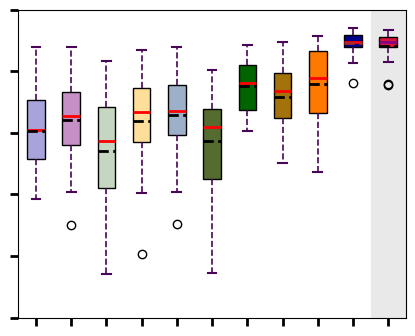

1 	 1 	 1


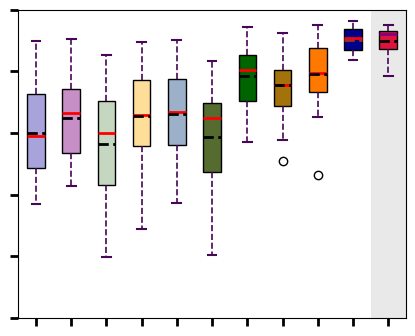

1 	 1 	 10


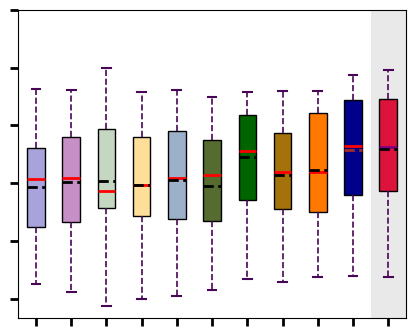

1 	 3 	 0.1


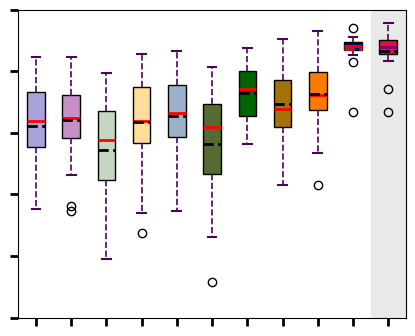

1 	 3 	 1


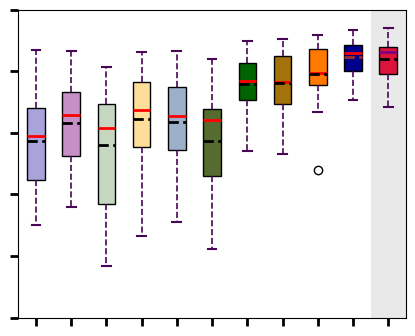

1 	 3 	 10


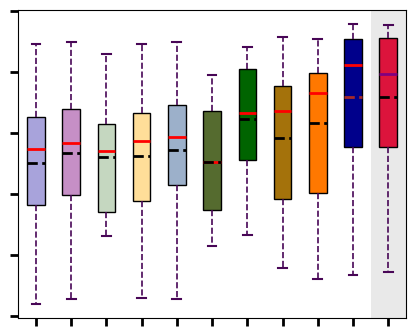

In [9]:
methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                 'KMcore_g1', 'KMcore_gf',
            'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'degree',
                'new_neiNodeSum_1_HNCsize']
for nu in [1,3]:
    for ratio in [0.1,1,10]:
        data_all = []
        for ms in methods_plt:
            data = []
            for net in range(1,21):
                lThres = nets_paras[net]['l'][nu-1]
                l = lThres*ratio
                if not math.isnan(tauDic[net][nu][l][ms]):
                    data.append(tauDic[net][nu][l][ms])
            data_all.append(data)
        plt.figure(figsize=(5,4))

        plt.axvspan(10.5, 11.5, color=(225/255, 225/255, 225/255), alpha=0.7, lw=0)

        f = plt.boxplot(data_all, 
                    patch_artist=True,  
                    medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 2},  
                    showmeans=True, 
                    meanline=True,
                    meanprops={   
                    'markeredgecolor': 'r', 'color': 'black', 'linewidth': 2},
                    whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'},
                    capprops={'linestyle': '-', 'linewidth': 1.5, 'color': '#480656'}
                    )

        colorlst = [colors[_] for _ in methods_plt]
        for patch, color in zip(f['boxes'], colorlst):
            patch.set_facecolor(color)

        f['medians'][9].set_color('r')
        f['medians'][9].set_linestyle('-')
        f['means'][9].set_color('brown')
        
        f['medians'][10].set_color('purple')
        f['medians'][10].set_linestyle('-')
        f['means'][10].set_color('black')


        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])

        plt.tick_params(axis='y', labelsize=16) 
        plt.tick_params(axis='x', labelsize=16)
        plt.tick_params(axis='x', which='major', size=6, width=2) 
        plt.tick_params(axis='y', which='major', size=6, width=2) 

        plt.gca().set_xticklabels([])
        plt.gca().set_yticklabels([])


        muName = int(mu*10)
        nuName = nu
        ratioName = int(ratio*10)
        print(mu,'\t', nu,'\t', ratio)
        plt.savefig(f'savefig/main_mu{muName}_nu{nuName}_lr{ratioName}.svg', format='svg', bbox_inches='tight',dpi=300)
        plt.show()